In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
# from sklearn.feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.externals import joblib

In [47]:
#####univariate analysis
train=pd.read_csv('train.csv',sep=',')
test=pd.read_csv('test.csv',sep=',')

In [48]:
train.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country,Income.Group
0,1,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,4,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,5,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [52]:
test.head()

,ID,Age,Workclass,Education,Marital.Status,Occupation,Relationship,Race,Sex,Hours.Per.Week,Native.Country
0,32562,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40.0,United-States
1,32563,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50.0,United-States
2,32564,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40.0,United-States
3,32565,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40.0,United-States
4,32566,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,30.0,United-States


In [53]:
test.shape

(1372, 11)

In [54]:
train.shape

(496, 12)

In [28]:
train.dtypes

ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [65]:
train.describe()

,ID,Age,Hours.Per.Week
count,496.000000,496.000000,496.000000
mean,248.500000,38.006048,39.635081
std,143.327132,13.365188,11.808313
min,1.000000,17.000000,1.000000
25%,124.750000,28.000000,40.000000
50%,248.500000,37.000000,40.000000
75%,372.250000,46.000000,41.250000
max,496.000000,90.000000,98.000000


In [32]:
categorical=train.dtypes.loc[train.dtypes=='object'].index

In [74]:
categorical

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')

In [34]:
train[categorical].apply(lambda x:len(x.unique()))

Workclass          7
Education         16
Marital.Status     7
Occupation        14
Relationship       6
Race               5
Sex                2
Native.Country    26
Income.Group       3
dtype: int64

In [36]:
train['Race'].value_counts()

White                 412
Black                  59
Asian-Pac-Islander     17
Amer-Indian-Eskimo      4
Other                   4
Name: Race, dtype: int64

In [40]:
#finding the percentage contribution to the particular column
train['Race'].value_counts()/train.shape[0]

White                 0.830645
Black                 0.118952
Asian-Pac-Islander    0.034274
Amer-Indian-Eskimo    0.008065
Other                 0.008065
Name: Race, dtype: float64

In [42]:
train['Native.Country'].value_counts()/train.shape[0]

United-States         0.889113
Mexico                0.024194
Puerto-Rico           0.006048
Iran                  0.006048
Canada                0.004032
Cuba                  0.004032
Portugal              0.004032
Germany               0.004032
Philippines           0.004032
England               0.004032
Columbia              0.002016
Cambodia              0.002016
Jamaica               0.002016
Uni                   0.002016
Haiti                 0.002016
Laos                  0.002016
Taiwan                0.002016
South                 0.002016
Honduras              0.002016
Italy                 0.002016
Poland                0.002016
Ecuador               0.002016
Thailand              0.002016
Dominican-Republic    0.002016
India                 0.002016
Name: Native.Country, dtype: float64

In [87]:
#interquartile range
np.percentile(train['Age'],[25,75])

array([28., 46.])

In [108]:
#What % of people in the train dataset have >50k
train['Income.Group'].value_counts()['>50K']/train.shape[0]

0.22782258064516128

In [110]:
train['Marital.Status'].value_counts()['Divorced']/train.shape[0]

0.14516129032258066

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9011b09b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9011bf278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9011b0860>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9011bfa58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9011bfe48>],
 'means': []}

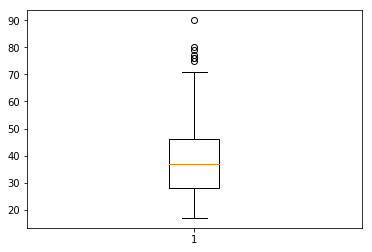

In [119]:
plt.boxplot(train['Age'])